# Cat vs Dog Classifier
> Buiding a cat vs dog classifier using fastai

- badges: true
- comments: true
- author: Naman Manchanda
- categories: [fastai, jupyter, python, pytorch]

<h1><center>Cat vs Dog Classifier</center></h1>
<center>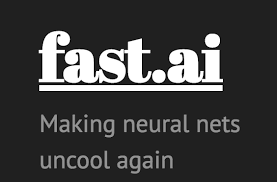</center>

**fastai** is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches. It aims to do both things without substantial compromises in ease of use, flexibility, or performance. This is possible thanks to a carefully layered architecture, which expresses common underlying patterns of many deep learning and data processing techniques in terms of decoupled abstractions. fastai applications include:
- Vision
- Text
- Tabular
- Collaborative filtering <a id=100></a>

## 1. Packages

In [1]:
from fastai.vision.all import *        # line 1

## 2. Data

> *untar_data*(***url***, ***fname***=*None*, ***dest***=*None*, ***c_key***=*'data'*, ***force_download***=*False*,
***extract_func***=*file_extract*, ***timeout***=*4*)

`untar_data` is a very powerful convenience function to download files from `url` to `dest`. The `url` can be a default `url` from the `URLs` class or a custom url. If `dest` is not passed, files are downloaded at the `default_dest` which defaults to `~/.fastai/data/`. This convenience function extracts the downloaded files to `dest` by default. In order, to simply download the files without extracting, pass the `noop` function as `extract_func`. 

This line downloads a standard dataset from the fast.ai datasets collection (if not previously downloaded) to your server, extracts it (if not previously extracted), and returns a Path object with the extracted location.

In [2]:
path = untar_data(URLs.PETS)/'images'        # line 2

The Pet dataset contains 7,390 pictures of dogs and cats, consisting of 37 breeds.

## 3. DataLoader

#### 3.1 Label function
The names of the images starting with an uppercase letter are cat images and the rest are the dog images.

In [3]:
def is_cat(x): return x[0].isupper()        # line 3

#### 3.2 Image Data Loader

> *ImageDataLoaders*(***loaders***, ***path***=*'.'*, ***device***=*None*)

This is a wrapper around several` DataLoaders` with factory methods for computer vision problems.

This class should not be used directly, one of the factory methods should be preferred instead. All those factory methods accept as arguments:
- `item_tfms`: one or several transforms applied to the items before batching them
- `batch_tfms`: one or several transforms applied to the batches once they are formed
- `bs`: the batch size
- `val_bs`: the batch size for the validation `DataLoader` (defaults to `bs`)
- `shuffle_train`: if we shuffle the training `DataLoader` or not
- `device`: the PyTorch device to use (defaults to `default_device()`)

In [4]:
dls = ImageDataLoaders.from_name_func(        # line 4
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224))

The first part of the class name will generally be the type of data you have, such as image or text.

The other important piece of information that we have to tell fastai is how to get the labels from the dataset. Computer vision datasets are normally structured in such a way that the label for an image is part of the filename or path—most commonly the parent folder name. Here we’re telling fastai to use the `is_cat` function we just defined.

Finally, we define the `Transforms` that we need. A `Transform` contains code that is applied automatically during training; fastai includes many predefined `Transforms`, and adding new ones is as simple as creating a Python function.

There are two kinds: `item_tfms` are applied to each item (in this case, each item is resized to a 224-pixel square), while `batch_tfms` are applied to a batch of items at a time using the GPU, so they’re particularly fast.

The most important parameter to mention here is `valid_pct=0.2`. This tells fastai to hold out 20% of the data and *not use it for training
the model at all*.

## 4. Modelling

> *cnn_learner*(***dls***, ***arch***, ***normalize***=*True*, ***n_out***=*None*, ***pretrained***=*True*, ***config***=*None*, ***loss_func***=*None*, ***opt_func***=*Adam*, ***lr***=*0.001*, ***splitter***=*None*, ***cbs***=*None*, ***metrics***=*None*, ***path***=*None*, ***model_dir***=*'models'*...)

Build a convnet style learner from `dls` and `arch`

The model is built from `arch` using the number of final activations inferred from `dls` if possible (otherwise pass a value to `n_out`). It might be `pretrained` and the architecture is cut and split using the default metadata of the model architecture (this can be customized by passing a `cut` or a `splitter`).

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)        # line 5
learn.fine_tune(1)                                            # line 6

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.160443,0.025996,0.008119,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.072577,0.027073,0.008119,00:44


The sixth line of our code tells fastai how to *fit* the model. The architecture only describes a template for a mathematical function; it doesn’t actually do anything until we provide values for the millions of parameters it contains.


## 5. Prediction

#### 5.1 Widget module for uploading image
##### Not a part of model building process

In [6]:
import ipywidgets as widgets           # line 7
uploader = widgets.FileUpload()        # line 8
uploader

FileUpload(value={}, description='Upload')

#### 5.2 Prediction function - `helper()`

In [7]:
def helper():        # line 9
    
    # plotting the image
    img = PILImage.create(uploader.data[0])
    img.show()
    
    # predicting the image
    is_cat,_,probs = learn.predict(img)
    print(f"Is this a cat?: {is_cat}.")
    print(f"Probability it's a cat: {probs[1].item():.6f}")

#### 5.3 Predicting the image

Is this a cat?: True.
Probability it's a cat: 1.000000


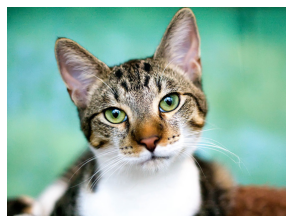

In [8]:
helper()        # line 10

Is this a cat?: False.
Probability it's a cat: 0.000003


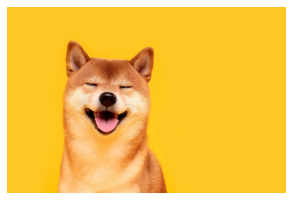

In [9]:
helper()

It is quite evident from prediction probabilities that **fastai** can be used to develop state of the art ML models in just a few lines of code.

All the code in the notebook is the boilerplate code available on the [fast.ai](https://www.fast.ai/) website.

The documentation in the notebook is also taken from the official fastai docs that can be found [here](https://docs.fast.ai/).

## If you liked the notebook, please leave an upvote. Thank you ;)
[back to top](#100)

Check out my other notebooks:-
1. https://www.kaggle.com/namanmanchanda/star-wars-classifier
2. https://www.kaggle.com/namanmanchanda/pima-indian-diabetes-eda-and-prediction
3. https://www.kaggle.com/namanmanchanda/tps-april-complete-eda-prediction